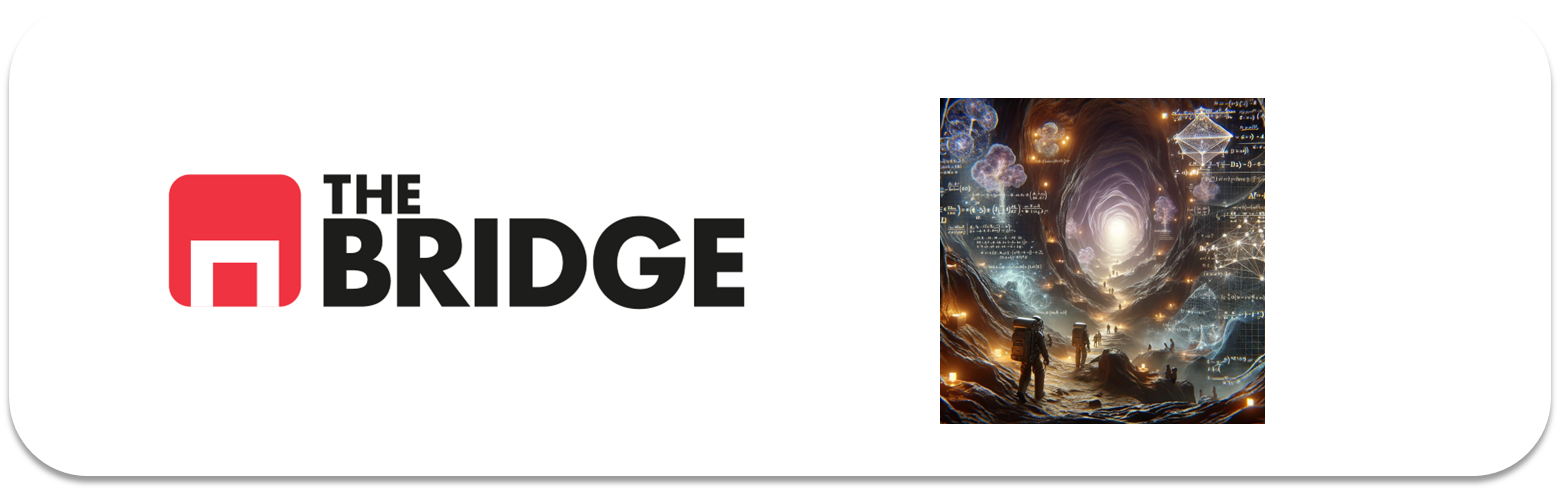

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [24]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.


In [3]:
df = pd.read_csv("./data/titanic.csv")

target = "survived"

excluidas = ["embark_town","alive","class", "adult_male"] # son datos repetidos (o combinaciones lineales) en otras columnas

In [4]:
df_deck = df.copy()
df_deck["deck"] = df_deck.deck.fillna("UNK")

In [5]:
features_base = [col for col in df_deck.columns if col not in excluidas ]
features_base.remove("deck") #la quitamos por tener una gran cantidad de valores nulos


In [6]:
df_deck.loc[df_deck["embarked"].isna(), "embarked"] = "S" 
train_set, test_set = train_test_split(df_deck, test_size= 0.2, stratify= df_deck["embarked"], random_state= 42)

In [23]:
df_deck

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,UNK,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,UNK,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,UNK,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,UNK,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,UNK,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
es_hombre = train_set.who == "man"
es_mujer = train_set.who == "woman"
es_child = train_set.who == "child"

mean_man = train_set[es_hombre]["age"].mean()
mean_woman = train_set[es_mujer]["age"].mean()
mean_child = train_set[es_child]["age"].mean()
es_nulo = train_set.age.isna()
es_nulo_test = test_set.age.isna()

train_set.loc[es_hombre & es_nulo, "age"] = mean_man
train_set.loc[es_mujer & es_nulo, "age"] = mean_woman
train_set.loc[es_child & es_nulo, "age"] = mean_child

test_set.loc[(test_set.who == "man") & es_nulo_test, "age"] = mean_man
test_set.loc[(test_set.who == "woman") & es_nulo_test, "age"] = mean_woman
test_set.loc[(test_set.who == "child") & es_nulo_test, "age"] = mean_child

In [8]:
features_num = ["age","sibsp","parch","fare"]

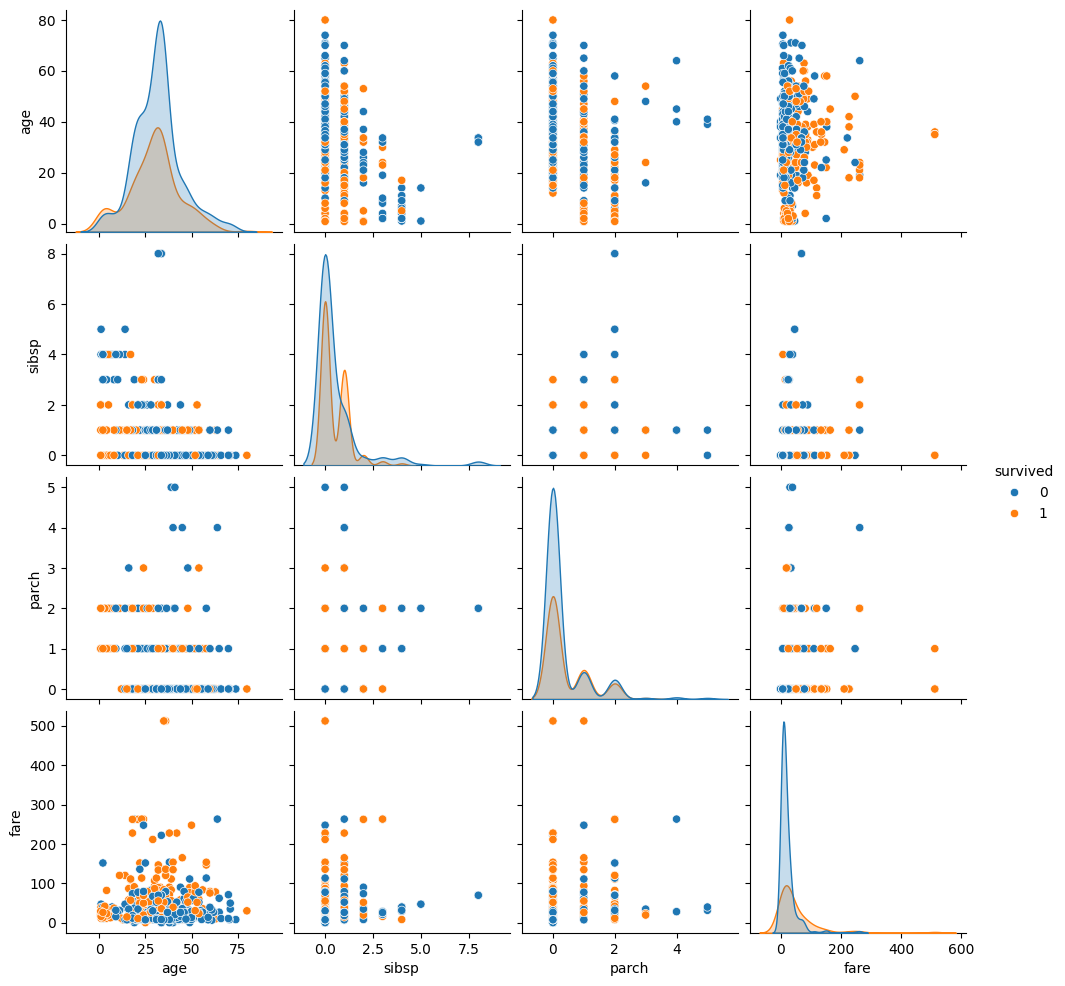

In [9]:
sns.pairplot(train_set[features_num + [target]], hue = target)

In [10]:
features_num = ["fare","age","sibsp"]

In [11]:
features_cat = ["pclass","sex","embarked","alone","who","deck"]

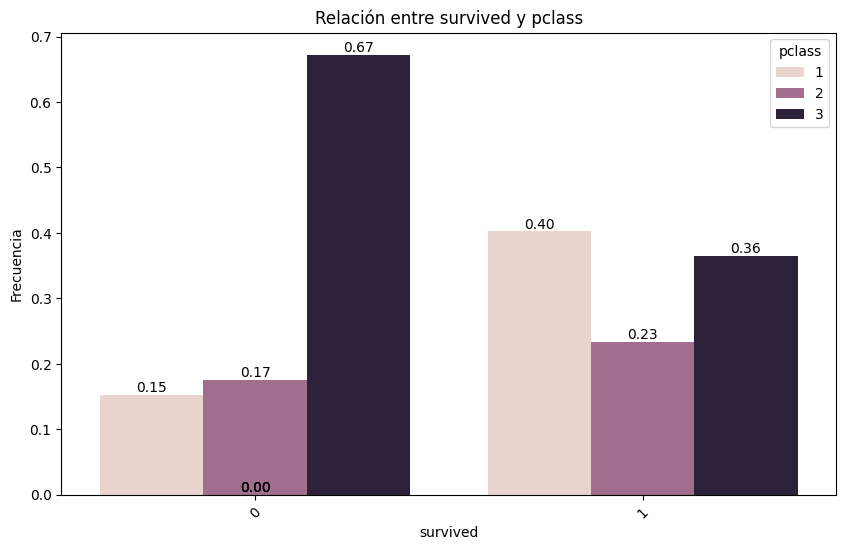

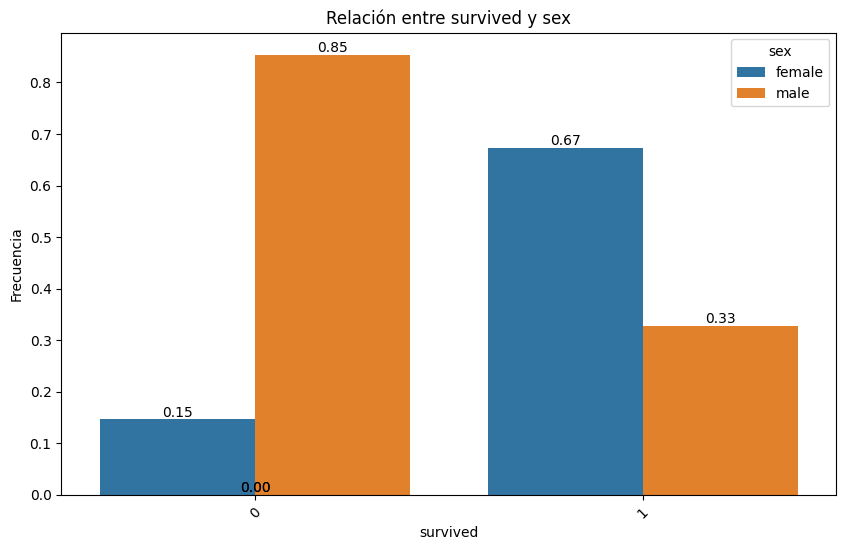

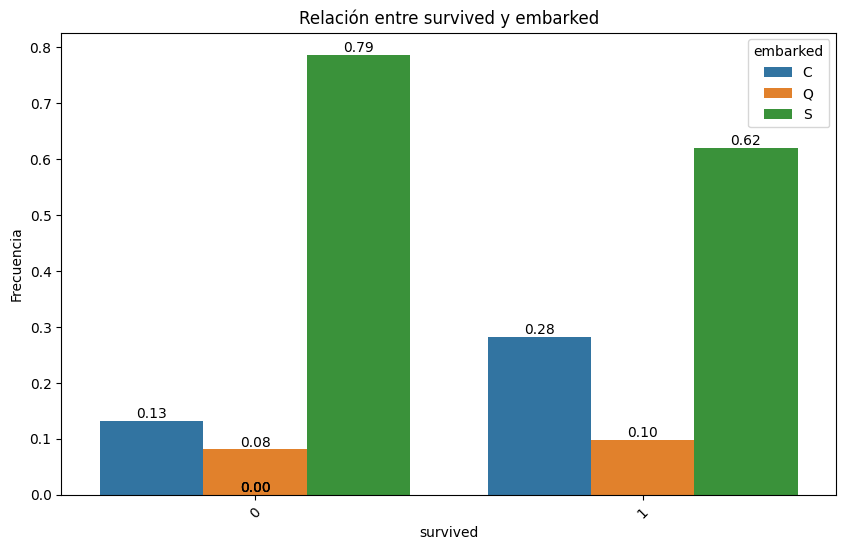

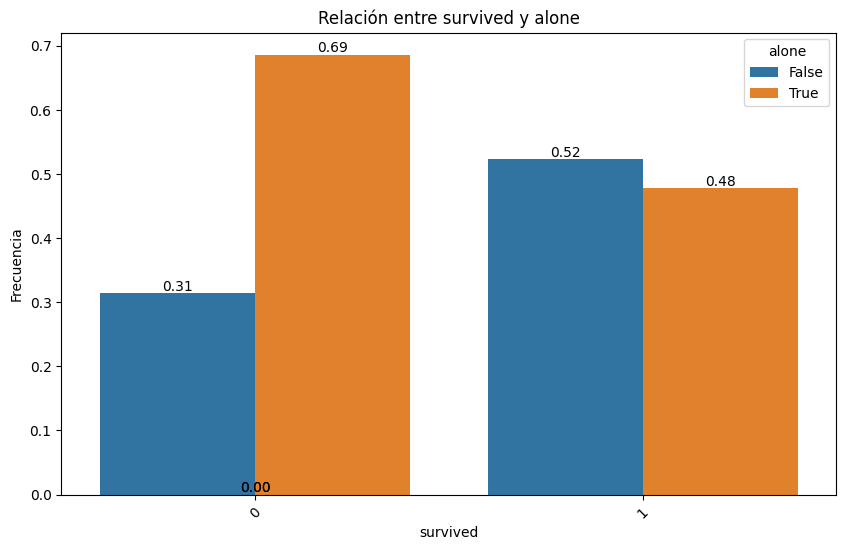

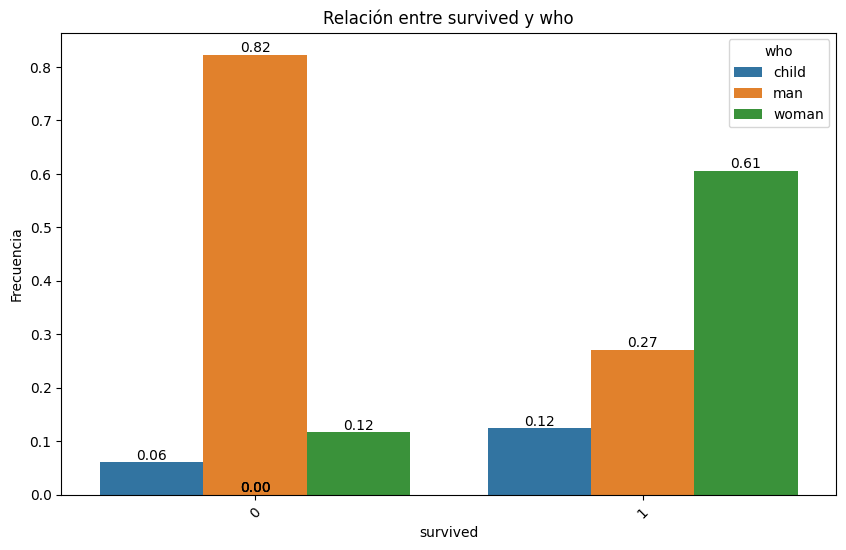

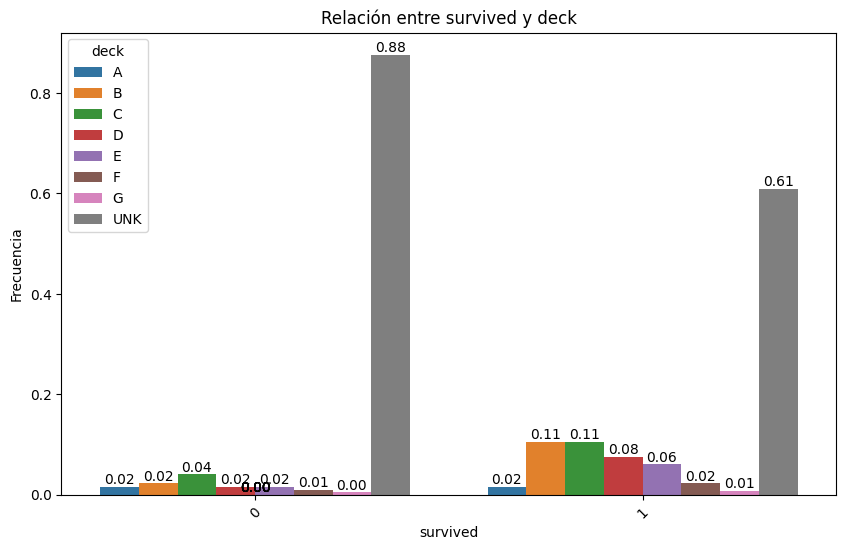

In [12]:
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

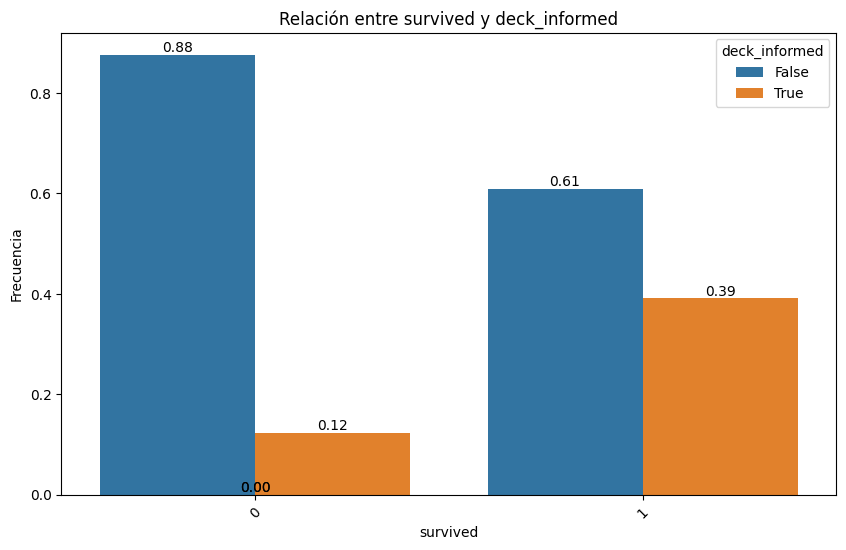

In [36]:
train_set["deck_informed"] = train_set.deck != "UNK" 
bt.plot_categorical_relationship_fin(train_set, target,"deck_informed", show_values= True, relative_freq= True)
test_set["deck_informed"] = test_set.deck != "UNK" 

In [14]:
features_cat.remove("deck")
features_cat.append("deck_informed")

In [15]:
features_num

['fare', 'age', 'sibsp']

In [16]:
features_cat

['pclass', 'sex', 'embarked', 'alone', 'who', 'deck_informed']

In [17]:
categories = [["male","female"],["S","C","Q"], ["child","woman","man"]]
encoder = OrdinalEncoder(categories= categories)
train_set[["sex","embarked","who"]] = encoder.fit_transform(train_set[["sex","embarked","who"]])
test_set[["sex","embarked","who"]] = encoder.transform(test_set[["sex","embarked","who"]])

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>, <Axes: >]], dtype=object)

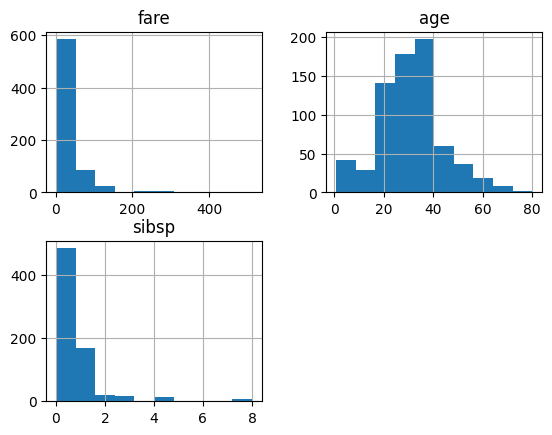

In [18]:
train_set[features_num].hist()

In [19]:
train_set["fare"] = np.sqrt(train_set["fare"])
test_set["fare"] = np.sqrt(test_set["fare"])
train_set["sibsp"] = np.sqrt(train_set["sibsp"])
test_set["sibsp"] = np.sqrt(test_set["sibsp"])

In [20]:
scaler = StandardScaler()

In [21]:
train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [65]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

minmax.fit(train_set[features_cat+features_num])

train_scaled= minmax.transform(train_set[features_cat+features_num])
test_scaled = minmax.transform(test_set[features_cat+features_num])

train_scaled_df = pd.DataFrame(train_scaled, columns=features_cat + features_num, index=train_set.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=features_cat + features_num, index=test_set.index)

In [73]:
train_scaled_df

,pclass,sex,embarked,alone,who,deck_informed,fare,age,sibsp
838,1.0,0.0,0.0,1.0,1.0,0.0,0.332073,0.394322,0.000000
621,0.0,0.0,0.0,0.0,1.0,1.0,0.320280,0.520505,0.353553
282,1.0,0.0,0.0,1.0,1.0,0.0,0.136172,0.192429,0.000000
275,0.0,1.0,0.0,0.0,0.5,1.0,0.390083,0.785489,0.353553
217,0.5,0.0,0.0,0.0,1.0,0.0,0.229566,0.520505,0.353553
...,...,...,...,...,...,...,...,...,...
594,0.5,0.0,0.0,0.0,1.0,0.0,0.225275,0.457413,0.353553
166,0.0,1.0,0.0,0.0,0.5,1.0,0.327647,0.394435,0.000000
121,1.0,0.0,0.0,1.0,1.0,0.0,0.125350,0.415214,0.000000
785,1.0,0.0,0.0,1.0,1.0,0.0,0.118958,0.305994,0.000000


In [66]:
# Definir el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Grid de parámetros
param_grid_rf = {
    'n_estimators': [195,198,200,203, 205],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2],
    'bootstrap': [True, False]
}

# Optimización de hiperparámetros
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(train_set[features_cat+features_num], train_set[target])

# Mejor modelo
best_rf_model = grid_search_rf.best_estimator_

In [33]:
best_rf_model

RandomForestClassifier(min_samples_leaf=2, n_estimators=205, random_state=42)

In [67]:
# Definir el modelo MLP (Deep Learning)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Grid de hiperparámetros para MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,),(200,), (50, 50), (100, 50),(100, 100),(200, 100),(200, 200)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Optimización de hiperparámetros para MLP
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(train_set[features_cat+features_num], train_set[target])

# Mejor modelo de MLP
best_mlp_model = grid_search_mlp.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

In [52]:
best_mlp_model.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [68]:
import time

# Entrenar y medir el tiempo para Random Forest
start_rf = time.time()
best_rf_model.fit(train_set[features_cat+features_num], train_set[target])
end_rf = time.time()

# Entrenar y medir el tiempo para MLP
start_mlp = time.time()
best_mlp_model.fit(train_set[features_cat+features_num], train_set[target])
end_mlp = time.time()

# Predicciones
y_pred_rf = best_rf_model.predict(test_set[features_cat+features_num])
y_pred_mlp = best_mlp_model.predict(test_set[features_cat+features_num])

# Métricas
metrics = {
    'Model': ['Random Forest', 'MLP'],
    'Accuracy': [accuracy_score(test_set[target], y_pred_rf), accuracy_score(test_set[target], y_pred_mlp)],
    'Precision': [precision_score(test_set[target], y_pred_rf), precision_score(test_set[target], y_pred_mlp)],
    'Recall': [recall_score(test_set[target], y_pred_rf), recall_score(test_set[target], y_pred_mlp)],
    'Training Time (s)': [end_rf - start_rf, end_mlp - start_mlp]
}

# Mostrar las métricas comparativas
comparison_df = pd.DataFrame(metrics)
print(comparison_df)

           Model  Accuracy  Precision    Recall  Training Time (s)
0  Random Forest  0.843575   0.887097  0.723684           0.148437
1            MLP  0.826816   0.857143  0.710526           2.608649


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
def metrics_titanic(model,X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

In [85]:
# Evaluación para el mejor modelo MLP
print("Classification Report - MLP")
print(classification_report(test_set[target], y_pred_mlp))

# Matriz de confusión para MLP
conf_matrix_mlp = confusion_matrix(test_set[target], y_pred_mlp)
print("Confusion Matrix - MLP")
print(conf_matrix_mlp)

Classification Report - MLP
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.85      0.75      0.80        76

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix - MLP
[[93 10]
 [19 57]]


Classification Report - MLP
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.85      0.75      0.80        76

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix - MLP
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       103
           1       0.91      0.28      0.42        76

    accuracy                           0.68       179
   macro avg       0.78      0.63      0.60       179
weighted avg       0.76      0.68      0.63       179



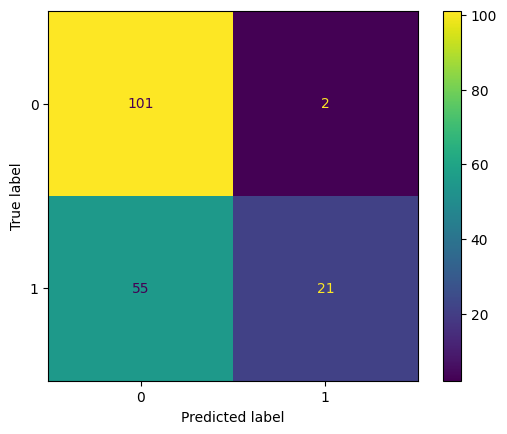

In [88]:
# Evaluación para el mejor modelo MLP
print("Classification Report - MLP")
print(classification_report(test_set[target], y_pred_mlp))

# Matriz de confusión para MLP
print("Confusion Matrix - MLP")
metrics_titanic(best_mlp_model, test_set[features_cat+features_num],test_set[target])

In [74]:
# Definir el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Grid de parámetros
param_grid_rf = {
    'n_estimators': [195,198,200,203, 205],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2],
    'bootstrap': [True, False]
}

# Optimización de hiperparámetros
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(train_scaled_df[features_cat+features_num], train_set[target])

# Mejor modelo
best_rf_model = grid_search_rf.best_estimator_

In [76]:
# Definir el modelo MLP (Deep Learning)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Grid de hiperparámetros para MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,),(200,), (50, 50), (100, 50),(100, 100),(200, 100),(200, 200)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Optimización de hiperparámetros para MLP
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(train_scaled_df[features_cat+features_num], train_set[target])

# Mejor modelo de MLP
best_mlp_model = grid_search_mlp.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

In [77]:
# Entrenar y medir el tiempo para Random Forest
start_rf = time.time()
best_rf_model.fit(train_scaled_df[features_cat+features_num], train_set[target])
end_rf = time.time()

# Entrenar y medir el tiempo para MLP
start_mlp = time.time()
best_mlp_model.fit(train_scaled_df[features_cat+features_num], train_set[target])
end_mlp = time.time()

# Predicciones
y_pred_rf = best_rf_model.predict(test_scaled_df[features_cat+features_num])
y_pred_mlp = best_mlp_model.predict(test_scaled_df[features_cat+features_num])

# Métricas
metrics = {
    'Model': ['Random Forest', 'MLP'],
    'Accuracy': [accuracy_score(test_set[target], y_pred_rf), accuracy_score(test_set[target], y_pred_mlp)],
    'Precision': [precision_score(test_set[target], y_pred_rf), precision_score(test_set[target], y_pred_mlp)],
    'Recall': [recall_score(test_set[target], y_pred_rf), recall_score(test_set[target], y_pred_mlp)],
    'Training Time (s)': [end_rf - start_rf, end_mlp - start_mlp]
}

# Mostrar las métricas comparativas
comparison_df = pd.DataFrame(metrics)
print(comparison_df)

           Model  Accuracy  Precision    Recall  Training Time (s)
0  Random Forest  0.837989   0.885246  0.710526           0.106972
1            MLP  0.837989   0.850746  0.750000           0.372188


Classification Report - MLP
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.85      0.75      0.80        76

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix - MLP
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.85      0.75      0.80        76

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



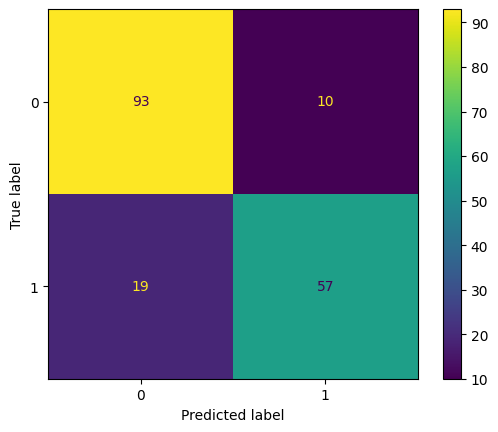

In [91]:
# Evaluación para el mejor modelo MLP
print("Classification Report - MLP")
print(classification_report(test_set[target], y_pred_mlp))

# Matriz de confusión para MLP
conf_matrix_mlp = confusion_matrix(test_set[target], y_pred_mlp)
print("Confusion Matrix - MLP")
metrics_titanic(best_mlp_model, test_scaled_df[features_cat+features_num],test_set[target])